In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install openpyxl

In [3]:
# Installing imblearn which could be used for balancing the imbalanced classes

!pip install imblearn

In [4]:
# Reading the dataset

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [5]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


This is the dataset, we have 32560 rows(0-32559).

We have 15 columns(0-14). 

We can also infer from here that the target column is "Income" and it contains categorical data (has 2 classes "<=50K", ">50K"), hence is a Classification Problem We need to use Classification models to perform our predictions.

# Exploratory Data Analysis (EDA)

In [6]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


df.head() displays the first 5 row values(indexed from 0-4) from the dataset

In [7]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


df.tail() displays the last 5 row values(indexed from 32555 to 32559) from the dataset

In [8]:
df.shape

(32560, 15)

Rows - 32560

Columns - 15

In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

df.columns gives the names of the column headings

In [10]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

df.dtypes gives the datatype of the variables

The columns "Workclass", "Education", "Marital_status", "occupation", "relationship", "race", "sex", "native_country"contains string values in them and hence its datatype is not identified and is displayed as object

The target column also contains '>' and '<=' arithematic symbols along with the number, even this is not identifiable and datatype is displayed as object



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


from df.info() we can infer that we have 32560 row entries in total(0-32559)

we have 15 data columns(0-14)
    
All 15 data column contains has no null values, hence the non-null count is 32560 for all these 15 columns of dataset
    
Most of the columns have either string or int as the values and hence the int and object is displayed 

The columns "Workclass", "Education", "Marital_status", "occupation", "relationship", "race", "sex", "native_country"contains string values in them and hence its datatype is not identified and is displayed as object
We need to convert them into python identifiable type

The target column also contains '>' and '<=' arithematic symbols along with the number, even this is not identifiable and datatype is displayed as object

In [12]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

no null or missing values present in the dataset

In [13]:
# Trying to find the duplicate rows in our dataset

duplicate=df.duplicated()
print(duplicate.sum())      # gives no. of duplicate rows in the dataset
df[duplicate]               # prints the duplicate rows in the dataset

24


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


There are 24 duplicate rows present in our dataset. Hence need to drop them

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


 From df.describe() we can see the details about various statistical data like Count,Mean,Standard Deviation,Max Value,Min Value for our dataset
    
So from min and max values, we basically get the range

There seems to be some outliers anyways will verify that when we check for outliers presence.  

There are many values as 0 in the columns capital_gain and capital_loss


In [17]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

The target column Income has two classes "<=50" , ">50"

In [18]:
df["Income"].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

The classes in our target column are highly imbalanced. We need to balance them

# Data Visualization

# Uni - Variant Analysis

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

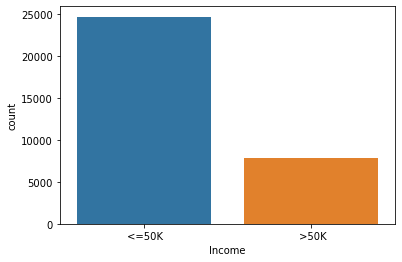

In [19]:
sns.countplot(df["Income"])
df["Income"].value_counts()

We can clearly visualize that our target column has 2 classes "<=50K" and ">50K" and are imbalanced

We need to balance the classes

24697 people have income <=50K

7838 people have income >50K

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

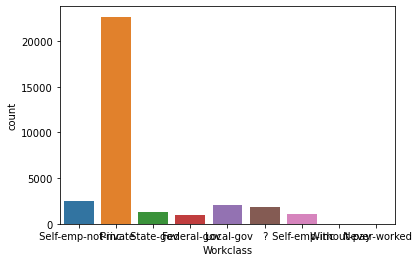

In [20]:
sns.countplot(df["Workclass"])
df["Workclass"].value_counts()

Above shows the plot of people Workclass

Maximum no. of people i.e., 22673 work for private

The count of self-emp-not-inc is 2540

No. of people working for locan-govt is 2093

1836 no. of values are filled with '?'

1297 work for state - gov

1116 for self-emp-inc

960 for federal gov, 14 work without pay and 7 people never worked

<AxesSubplot:xlabel='Age', ylabel='Density'>

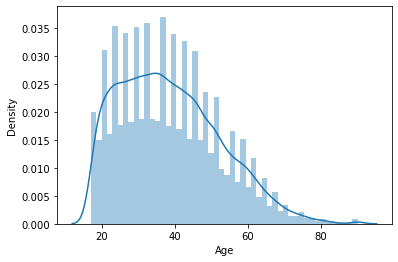

In [21]:
sns.distplot(df['Age'])

This shows the distribution of age

Age of people is distributed over the range of 17 to 90

Large amount of people belong to range 20-50, count of people above age of 60 are less


<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

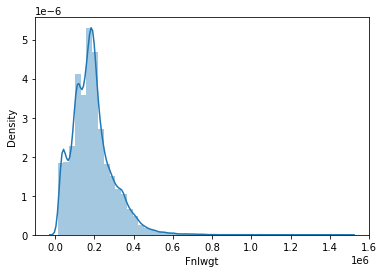

In [22]:
sns.distplot(df["Fnlwgt"])

This plot shows the distribution of final weight

It is in the range of 12285 to 1484705


 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

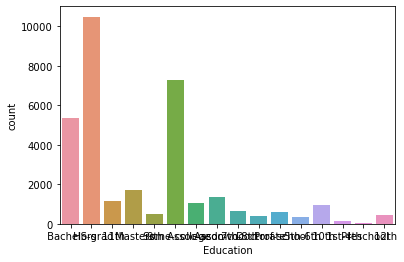

In [23]:
sns.countplot(df["Education"])
df["Education"].value_counts()

The above graph shows the education of people

10494 people hold HS-grad, 7282 go to some college, 5352 hold bachelors, 1722 hold masters, 1382 as Assoc-voc

Students studying in class 11th are 1175, 10th are 933 in number, 9th are 514, 12th are 433, studying in 5th to 6th are 332,
ones is 1st-4th are 166, students in pre school are 50, 413 are doctrates, 576 are school professors
 

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

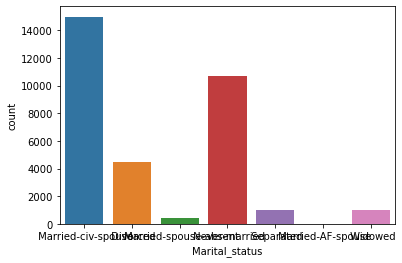

In [24]:
sns.countplot(df["Marital_status"])
df["Marital_status"].value_counts()

Shows the count of people with their marital status

majority (14970) are married-civ-spouse

10666 number of people are nevered married

4441 people are divorced, 1025 are separated, 993 are widowed , married -AF-spouse are 23 in number and 418 are married-spouse-absent 

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

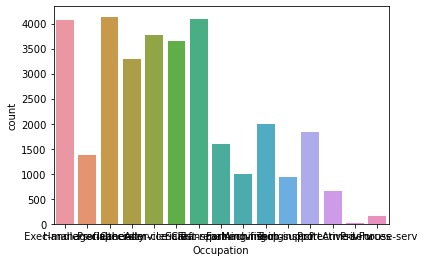

In [25]:
sns.countplot(df["Occupation"])
df["Occupation"].value_counts()

We can see the occupation of people 

Majority of peoples occupation are either prof-speciality, craft-repair, exec managerial

3650 works for sale , 927 tech supports

Very less people work for armed-forces

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

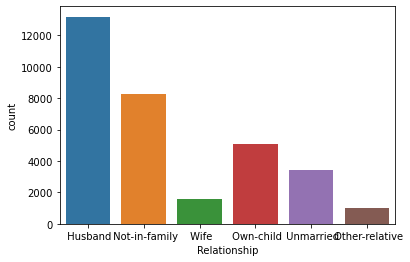

In [26]:
sns.countplot(df["Relationship"])
df["Relationship"].value_counts()

Majority of people in this survey whos income is calculated are husbands(13187), 8291 not-in-family, 3445 are unmarried, 1568 are wives

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

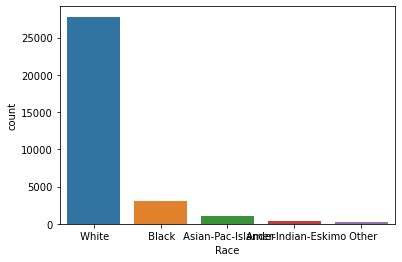

In [27]:
sns.countplot(df["Race"])
df["Race"].value_counts()

The race of people are shown above

Majority of people are whites, balck are 3122 in number , asian-pac-islander are 1038, 311 are amer-indian-eskimos and 271 are others

 Male      21774
 Female    10762
Name: Sex, dtype: int64

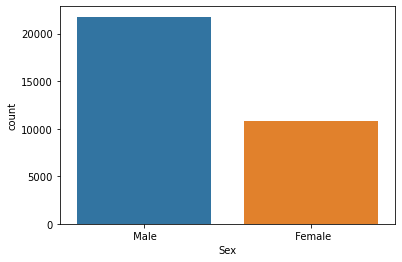

In [28]:
sns.countplot(df["Sex"])
df["Sex"].value_counts()

Majorith of people in census survey are males 21774 and females are 10762 in number 

The ratio of males are double that of females

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

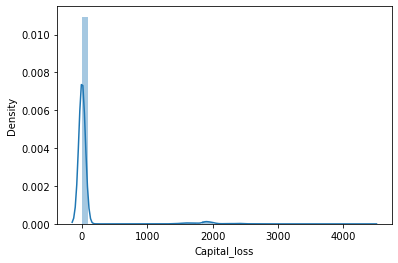

In [29]:
sns.distplot(df['Capital_loss'])

Capital_loss is almost normally distributed and majority value is 0

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

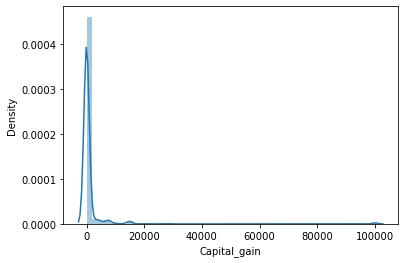

In [30]:
sns.distplot(df['Capital_gain'])

Capital_gain is almost normally distributed and majority value is 0

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

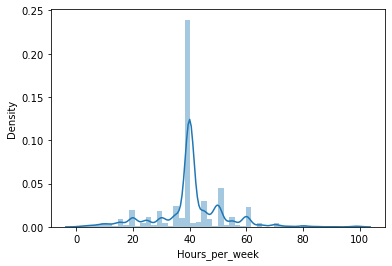

In [31]:
sns.distplot(df['Hours_per_week'])

Shows the distribution of working hours per week

Majority of people work for 40 hrs per week

In [32]:
# Import label encoder

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Income']= label_encoder.fit_transform(df['Income'])
df['Income'].unique()


array([0, 1])

We have converted the target column to 0 and 1 

0 indicating income less than 50K

1 indicating income greater than 50K

In [33]:
df['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32536, dtype: int32

# Bi-Variant Analysis

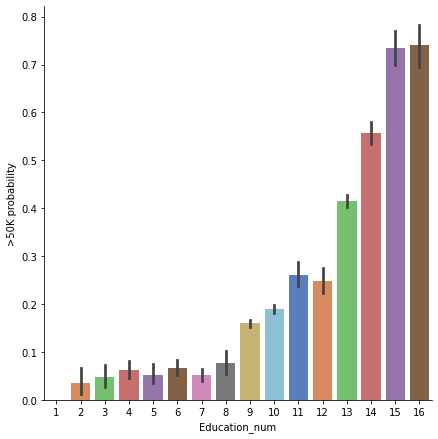

In [34]:
# Explore Education Num vs Income
g = sns.factorplot(x="Education_num",y="Income",data=df,kind="bar",size = 6,palette = "muted")
g = g.set_ylabels(">50K probability")

Plot shows the graph of education_num verses income greater than 50K

At education_num 15 and 16 we have larger count of people with income >50K

<AxesSubplot:xlabel='count', ylabel='Sex'>

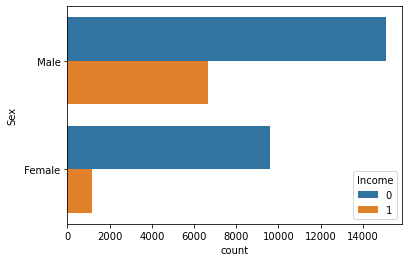

In [35]:
sns.countplot(y = "Sex", hue = "Income", data = df)

No. of males earning more than 50K is less than half of people earning less than 50K

Among females very few earn greater than 50K and most of them earn less than 50K

<AxesSubplot:xlabel='count', ylabel='Education'>

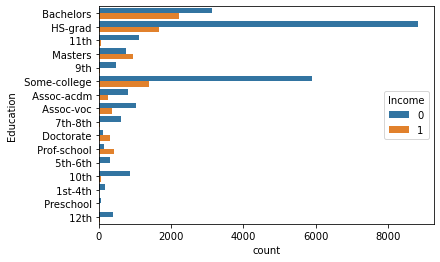

In [36]:
sns.countplot(y = "Education", hue = "Income", data = df)

People with Bachelors , masters, some college and HS-grad as their education background earn more than 50K

Large no. of people with education HS-grad earn less than 50K

<AxesSubplot:xlabel='count', ylabel='Occupation'>

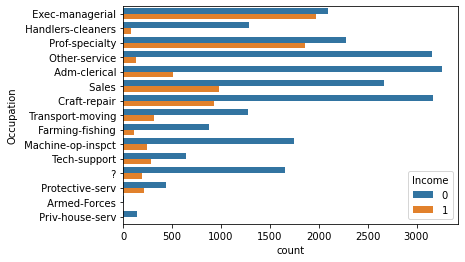

In [37]:
sns.countplot(y = "Occupation", hue = "Income", data = df)

Majority of people whos occupation is exec-managerial, prof -speciality earn more than 50K

People whos occupations are sales and craft repair also earn more than 50K



In [38]:
# Identify Numeric features
numeric_features = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week','Income']

# Identify Categorical features
cat_features = ['Workclass','Education','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country','Income']

Identifying numerical and categorical features

<AxesSubplot:>

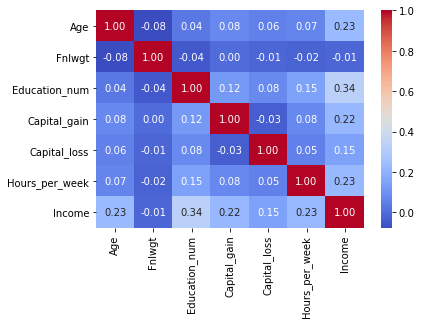

In [39]:
# Correlation matrix between numerical values
sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


This shows the correlation among the numerical features

In [40]:
df['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Majority of people are from US (29152)

Only 1 from Holand_Netherlands

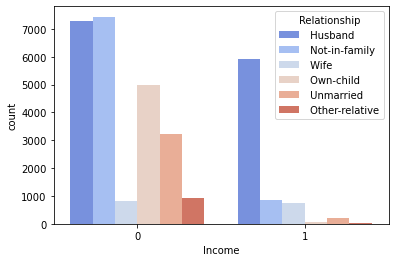

In [41]:
sns.countplot(df['Income'], palette='coolwarm', hue='Relationship', data=df);

Larger number of people who's relationship type are Husband and not-in-family earn less than 50K

Larger number of people who earn more than 50K are having the relationship type as husband

### Filling ? values

In [42]:
#replace the values with mode

df['Workclass'] = df['Workclass'].replace('?','Private')
df['Occupation'] = df['Occupation'].replace('?', 'Prof-specialty')
df['Native_country'] = df['Native_country'].replace('?','United-States')
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


All the '?' values are handled

In [43]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515,0.234039
Fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900,-0.009521
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426,0.335299
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408,0.223340
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229,0.150498
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000,0.229659
Income,0.234039,-0.009521,0.335299,0.223340,0.150498,0.229659,1.000000


The above shows the correlation of the numerical columns

# Multi-variant analysis

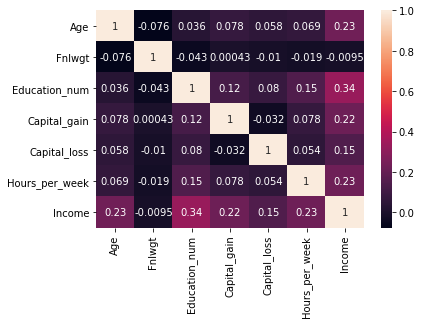

In [44]:
sns.heatmap(df.corr(), annot=True);

The above show the correlation values

The columns that are decently correlated with the target income is Education_num, hours_per_week, age and also capital_gain

least correlated is final weight

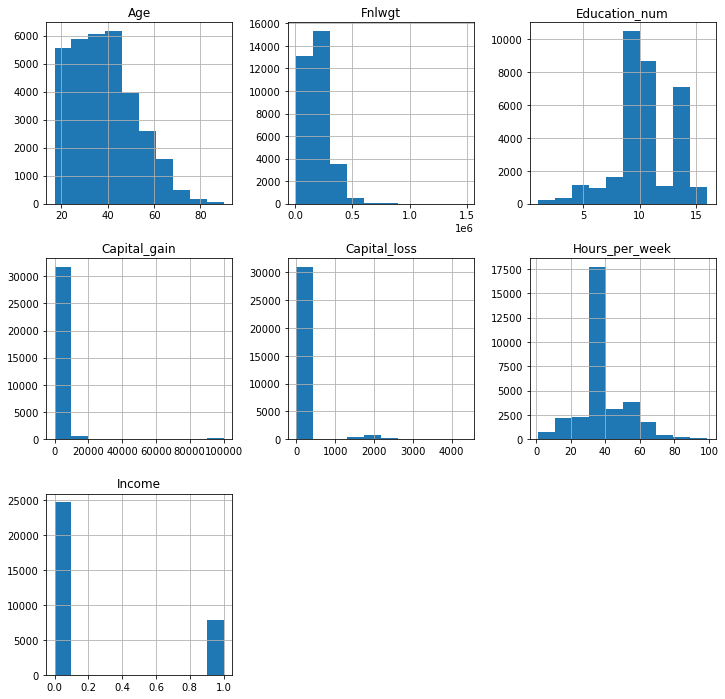

In [45]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

The above hist shows the distribution of numerical columns

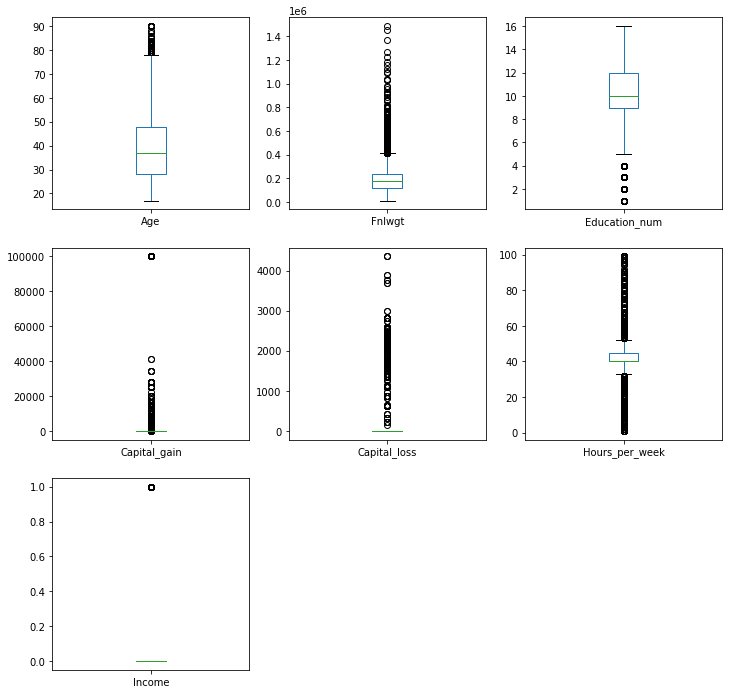

In [46]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

There is presence of outliers in the data , lets check for skewness

In [47]:
df.skew()

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Income             1.211640
dtype: float64

Capital loss and gain have high skewness present in them

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

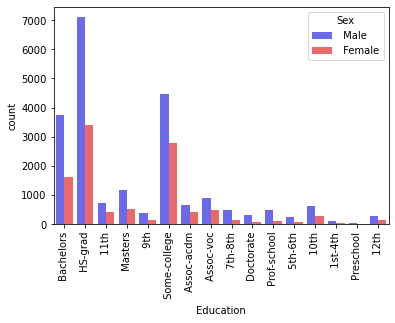

In [48]:
sns.countplot(df['Education'], hue='Sex', data=df, palette='seismic');
plt.xticks(rotation='vertical')

Large number of HS-grad education are held by males 

### Model building

In [49]:
from sklearn.preprocessing import LabelEncoder
df2= df.copy()
df2= df2.apply(LabelEncoder().fit_transform)
df2.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [52]:


# Split-out Validation Dataset and Create Test Variables
array = df2.values
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Split Data: X
[[   33     6  2925 ...     2     4     0]
 [   21     4 14085 ...     0     6     1]
 [   36     4 15335 ...     2     6     0]
 ...
 [   41     4  7882 ...     6     1     4]
 [    5     4 12880 ...     4     1     3]
 [   35     5 17824 ...     2     4     5]]
Split Data: Y
[4 4 2 ... 4 4 4]
LR: 0.853273 (0.006753)
LDA: 0.853504 (0.006613)
KNN: 0.835715 (0.008347)
CART: 0.752996 (0.007581)
NB: 0.850161 (0.007368)
RF: 0.844667 (0.006831)
SVM: 0.853465 (0.006768)


# Hyper-parameter tuning

In [54]:
# Tune Random Forest
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5])
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.845705 using {'max_features': 5, 'n_estimators': 150}
0.836752 (0.005709) with: {'max_features': 1, 'n_estimators': 50}
0.839711 (0.006633) with: {'max_features': 1, 'n_estimators': 100}
0.839941 (0.006973) with: {'max_features': 1, 'n_estimators': 150}
0.839749 (0.007519) with: {'max_features': 1, 'n_estimators': 200}
0.840479 (0.006291) with: {'max_features': 1, 'n_estimators': 250}
0.840940 (0.007224) with: {'max_features': 2, 'n_estimators': 50}
0.841709 (0.005619) with: {'max_features': 2, 'n_estimators': 100}
0.841939 (0.006805) with: {'max_features': 2, 'n_estimators': 150}
0.842477 (0.006895) with: {'max_features': 2, 'n_estimators': 200}
0.842708 (0.007181) with: {'max_features': 2, 'n_estimators': 250}
0.841747 (0.006564) with: {'max_features': 3, 'n_estimators': 50}
0.843284 (0.006917) with: {'max_features': 3, 'n_estimators': 100}
0.843784 (0.006126) with: {'max_features': 3, 'n_estimators': 150}
0.843630 (0.007020) with: {'max_features': 3, 'n_estimators': 200}
0.8

#  Finalize Model

In [55]:

random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 85.23355869698833%
[[   1    0    0    0   62]
 [   1    7    6    0  185]
 [   0    0   47    0  563]
 [   0    0    5    1   50]
 [   3   12   72    2 5491]]
              precision    recall  f1-score   support

           0       0.20      0.02      0.03        63
           1       0.37      0.04      0.06       199
           2       0.36      0.08      0.13       610
           3       0.33      0.02      0.03        56
           4       0.86      0.98      0.92      5580

    accuracy                           0.85      6508
   macro avg       0.43      0.23      0.24      6508
weighted avg       0.79      0.85      0.80      6508



We have achieved 85% accuracy from RandomForest Classifier after hyper-parameter tuning

# Random Forest Classifier is the best model

# Saving the model

In [56]:
# Serializing or saving the model
# Importing the necessary library for saving the model

import joblib
joblib.dump(random_forest,"FinalModel.pkl")

['FinalModel.pkl']

# Final model is saved